In [1]:
import json
import os
import numpy as np
from matplotlib import pyplot as plt

print(os.getcwd())
while not os.path.exists('./model'):
    os.chdir('..')
os.chdir('model')
print(os.getcwd())

C:\Users\jepid\PycharmProjects\HydraDX-simulations\hydradx\notebooks\Money Market
C:\Users\jepid\PycharmProjects\HydraDX-simulations\hydradx\model


In [38]:
hdx_prices = {}
hdx_price_files = [f for f in os.listdir("./data/prices") if f.lower().startswith(f"hdx asset state ")]
for file_name in hdx_price_files:
    with open(f"./data/prices/{file_name}", 'r') as file:
        hdx_prices.update(json.load(file))

# usd_prices = {}
# usd_price_files = [f for f in os.listdir("./data/prices") if f.lower().startswith(f"usdt asset state ")]
# for file_name in usd_price_files:
#     with open(f"./data/prices/{file_name}", 'r') as file:
#         usd_prices.update(json.load(file))

In [39]:
blocks = sorted(list(hdx_prices.keys()))

In [40]:
# min_block = int(min(usd_prices.keys()))
# max_block = int(max(usd_prices.keys()))

In [41]:
hdx_lrna = {k: float(v['LRNA']) / 10 ** 12 for k, v in hdx_prices.items()}
hdx_prices = {k: float(v['LRNA']) / float(v['liquidity']) for k, v in hdx_prices.items()}
# usd_normalized = {k: float(p['LRNA']) / float(p['liquidity']) for k, p in usd_prices.items()}

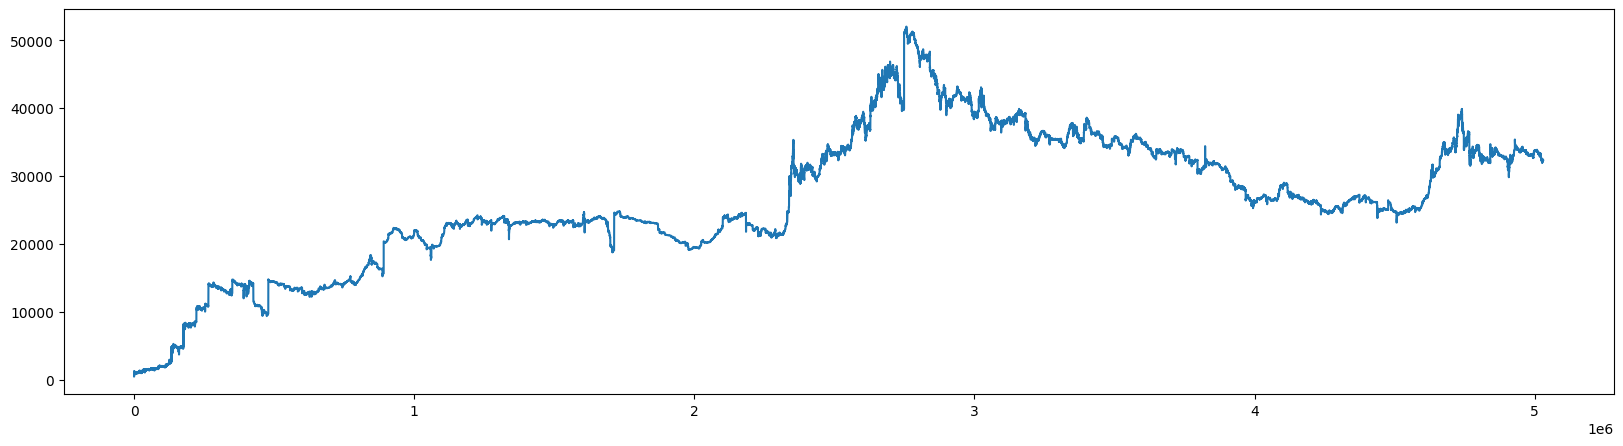

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(list(hdx_lrna.values()))

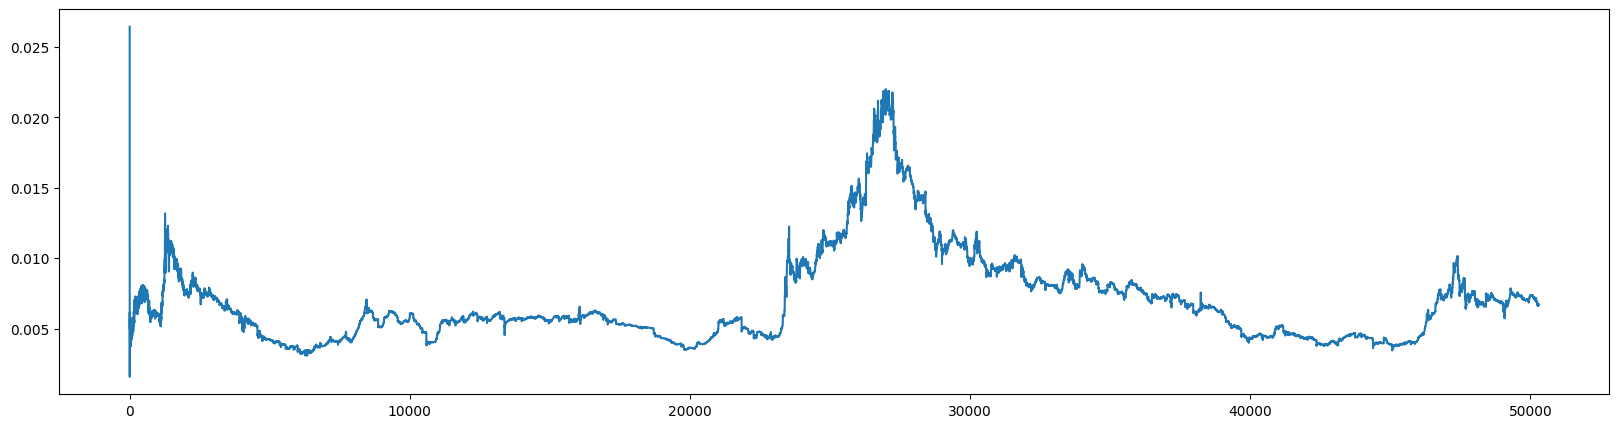

In [9]:
plt.figure(figsize=(20, 5))
plt.plot([
    hdx_prices[str(i)] * 22
    for i in blocks[::100]
])
    

In [10]:
# plt.figure(figsize=(20, 5))
# plt.plot(usd_normalized.values())

In [91]:
def find_shortest_drops(hdx_prices, min_drop_size=0.15):
    hdx_prices = np.array(hdx_prices)
    n = len(hdx_prices)
    shortest_drop = n - 1
    drop_history = []
    i = 0
    min_peak = np.min(hdx_prices) / (1 - min_drop_size)

    while i < n:
        if i + shortest_drop + 1 > n:
            break

        if hdx_prices[i] >= min_peak:
            drop_target = hdx_prices[i] * (1 - min_drop_size)
            for drop_length in range(1, shortest_drop + 1):
                if i + drop_length >= n:
                    break
                if hdx_prices[i + drop_length] <= drop_target:
                    shortest_drop = drop_length
                    drop_history.append((i + start_block + int(blocks[0]), shortest_drop))
                    print(drop_history[-1])

                    # Find the highest point within the drop range
                    highest_point_index = i
                    highest_point_value = hdx_prices[i]
                    
                    for j in range(i + 1, i + shortest_drop + 1):
                        if hdx_prices[j] > highest_point_value:
                            highest_point_value = hdx_prices[j]
                            highest_point_index = j

                    if highest_point_index > i :
                        i = highest_point_index - 1
                    break
        i += 1

    return drop_history

start_block = 1000000
hdx_price_list = [price for price in hdx_prices.values()][start_block:]
drop_history = find_shortest_drops(hdx_price_list)
one_block_drops = [drop for drop in drop_history if drop[1] == 1]

print(drop_history)

(2708101, 37418)
(2714003, 27943)
(2714004, 27942)
(2714005, 27941)
(2714006, 27940)
(2714007, 27939)
(2714008, 27938)
(2714009, 27937)
(2714010, 27936)
(2714011, 27935)
(2714012, 27934)
(2714013, 27933)
(2714014, 27932)
(2714015, 27931)
(2714016, 27930)
(2714017, 27929)
(2714018, 27928)
(2714019, 27927)
(2714020, 27926)
(2714021, 27925)
(2714022, 27924)
(2714023, 27923)
(2714024, 27922)
(2714025, 27921)
(2716171, 27921)
(2716172, 27920)
(2716173, 27919)
(2716174, 27918)
(2716175, 27917)
(2716176, 27916)
(2716177, 27915)
(2716178, 27914)
(2716179, 27913)
(2716180, 27912)
(2716181, 27911)
(2716182, 27910)
(2716183, 27909)
(2716184, 27908)
(2716185, 27907)
(2716186, 27906)
(2716187, 27905)
(2716188, 27904)
(2716189, 27903)
(2716190, 27902)
(2716191, 27901)
(2716192, 27900)
(2716193, 27899)
(2716194, 27898)
(2716195, 27897)
(2716196, 27896)
(2716197, 27895)
(2716198, 27894)
(2716199, 27893)
(2716200, 27892)
(2716201, 27891)
(2716202, 27890)
(2716203, 27889)
(2716204, 27888)
(2716205, 2788

KeyboardInterrupt: 

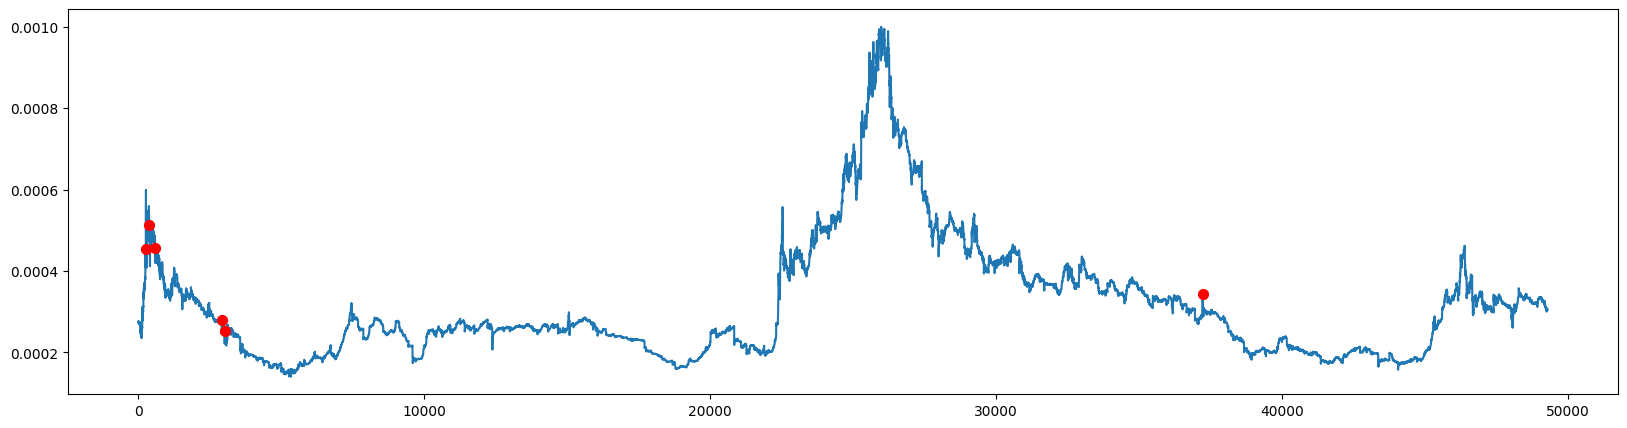

In [67]:
hdx_price_list
plt.figure(figsize=(20, 5))
plt.plot(hdx_price_list[::100])
for drop in one_block_drops:
    plt.scatter((drop[0] - start_block - int(blocks[0])) / 100, hdx_prices[str(drop[0])], marker='o', s=50, c='red', zorder=2)
plt.show()

In [54]:
for drop in one_block_drops:
    print(f"{drop[0]}: {round((1 - hdx_prices[str(drop[0])] / hdx_prices[str(drop[0] + 1)]) * 100, 3)}")

2099235: -21.057
2109789: -19.646
5531596: -19.766


In [55]:
hdx_prices['2099235'], hdx_prices['2099236']

(0.00028053517688259835, 0.000231737931412921)

In [100]:
drop_length = 20
start_at = 1000000
hdx_price_list = list(hdx_prices.values())[start_at:]
max_drop = 0
drop_index = 0
drop_list = []
for i in range(len(hdx_price_list) - drop_length):
    drop = 1 - hdx_price_list[i + drop_length] / hdx_price_list[i]
    if drop > max_drop:
        max_drop = drop
        drop_index = i
    drop_list.append((drop, i))
drop_list = sorted(drop_list, reverse=True)[:20]
# print(drop_list)

In [101]:
for drop in drop_list:
    print(f"block {start_at + int(blocks[0]) + drop[1]}: {round(drop[0] * 100, 3)}%")

block 5531577: 16.511%
block 5531578: 16.509%
block 5531579: 16.474%
block 5531580: 16.474%
block 5531581: 16.473%
block 5531582: 16.473%
block 5531583: 16.473%
block 5531584: 16.473%
block 5531585: 16.472%
block 5531586: 16.471%
block 5531587: 16.464%
block 5531589: 16.464%
block 5531588: 16.464%
block 5531591: 16.461%
block 5531590: 16.461%
block 5531592: 16.461%
block 5531596: 16.461%
block 5531595: 16.461%
block 5531594: 16.461%
block 5531593: 16.461%


In [73]:
drop_index + start_at + int(blocks[0])

5531592

In [86]:
(hdx_prices['5531473'], hdx_prices['5531480']), (hdx_lrna['5531473'], hdx_lrna['5531480'])

((0.00028968858442772276, 0.00034433835431102054),
 (31412.5868480224, 34247.644857862986))

In [92]:
steepest_drops = [5531592, 2983414, 3316487, 6215018, 4376234]

In [20]:
hdx_prices[str(int(blocks[58953]) + 100000)] / hdx_prices[str(int(blocks[58952]) + 100000)]

0.7683236738301474

In [75]:
drop_history[-1]

(5531596, 1)

In [80]:
(1 - hdx_prices['5531597'] / hdx_prices['5531592'])

0.16503805575672692

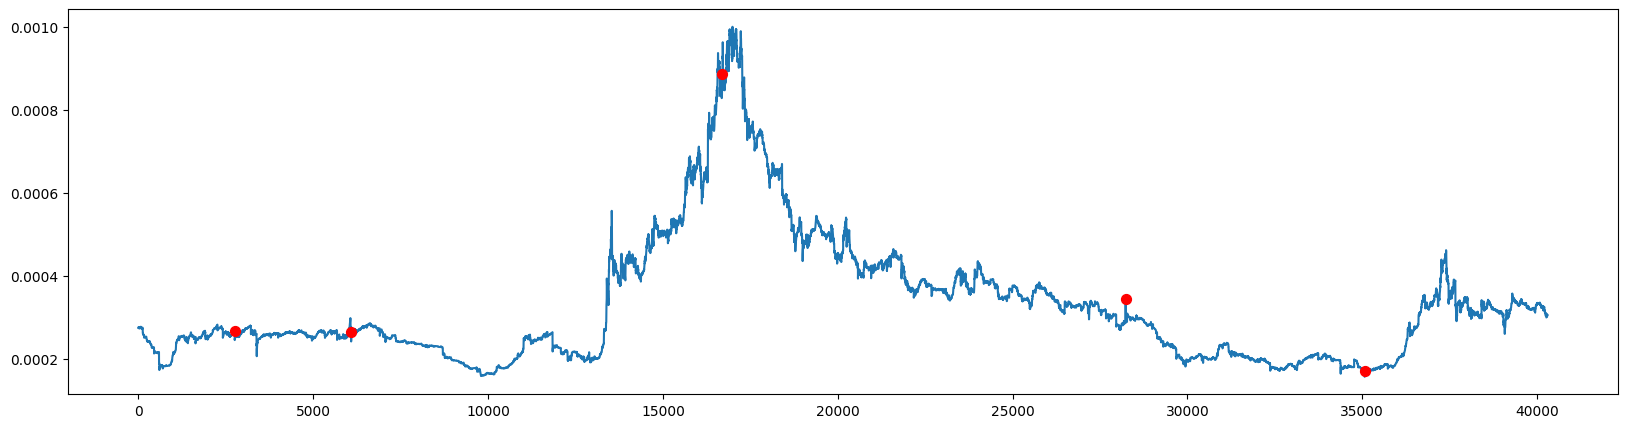

In [99]:
plt.figure(figsize=(20, 5))
plt.plot(hdx_price_list[::100])
for drop in steepest_drops:
    plt.scatter((drop - start_block - int(blocks[0])) / 100, hdx_prices[str(drop)], marker='o', s=50, c='red', zorder=2)
plt.show()